<a href="https://colab.research.google.com/github/velievarif123-sudo/intro-ai/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22lab3_PCA_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа № 3

## Задание
Решите пожалуйста следующую задачу.

1. Примените методы снижения размерности (до двумерного представления
n_components=2) перечисленные ниже для данных находящихся пo
[ссылке](https://drive.google.com/file/d/1LBDnhITL0Wqwp5G6M6IBI-SSz8BIoNec/view). Здесь - метка (учитель) является столбец / атрибут - `outcome`. Предоставьте результаты, используя следующие ядерные функции:
- PCA
- LDA
- TruncatedSVD
- Kernel PCA (перебрав все ядерные функции - ('linear', 'poly', 'rbf', sigmoid',
'cosine', 'precomputed')

## Загрузка данных

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
! gdown --fuzzy 'https://drive.google.com/file/d/1LBDnhITL0Wqwp5G6M6IBI-SSz8BIoNec/view'

Downloading...
From: https://drive.google.com/uc?id=1LBDnhITL0Wqwp5G6M6IBI-SSz8BIoNec
To: /content/diabetes.csv
100% 23.1k/23.1k [00:00<00:00, 31.7MB/s]


In [ ]:
df = pd.read_csv('/content/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


##  О датасете
[Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database/data)

Этот набор данных взят из Национального института диабета, заболеваний органов пищеварения и почек (NIDDK). Целью набора данных является диагностическое предсказание наличия у пациента диабета на основе определенных диагностических измерений, включенных в набор данных. На выбор этих экземпляров из более крупной базы данных было наложено несколько ограничений. В частности, все пациенты здесь — женщины не моложе 21 года, родом из индейцев Пима.

Наборы данных состоят из нескольких переменных медицинских предикторов и одной целевой переменной `Outcome`. Переменные-предикторы включают количество беременностей, которые были у пациентки, её индекс массы тела `BMI`, уровень инсулина, возраст и так далее. Всего в датасете 9 переменных:
- `Pregnancies` - количество беременностей;
- `Glucose` - концентрация глюкозы в плазме через 2 часа при пероральном тесте на толерантность к глюкозе;
- `BloodPressure` - диастолическое артериальное давление (мм рт. ст.);
- `SkinThickness` - толщина кожной складки трицепса (мм);
- `Insulin` - 2-часовой сывороточный инсулин (мкЕд/мл);
- `BMI` - Индекс массы тела (вес в кг/(рост в м)^2);
- `DiabetesPedigreeFunction` - функция оценки вероятности диабета на основе семейного анамнеза;
- `Age` - возраст (лет);
- `Outcome` - целевая переменная (0 или 1) 268 из 768 — 1 (больны), остальные — 0 (здоровы).



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler

# Разделение на признаки и целевую переменную
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Масштабирование
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Данные готовы и масштабированы.")

Данные готовы и масштабированы.


## Метод PCA

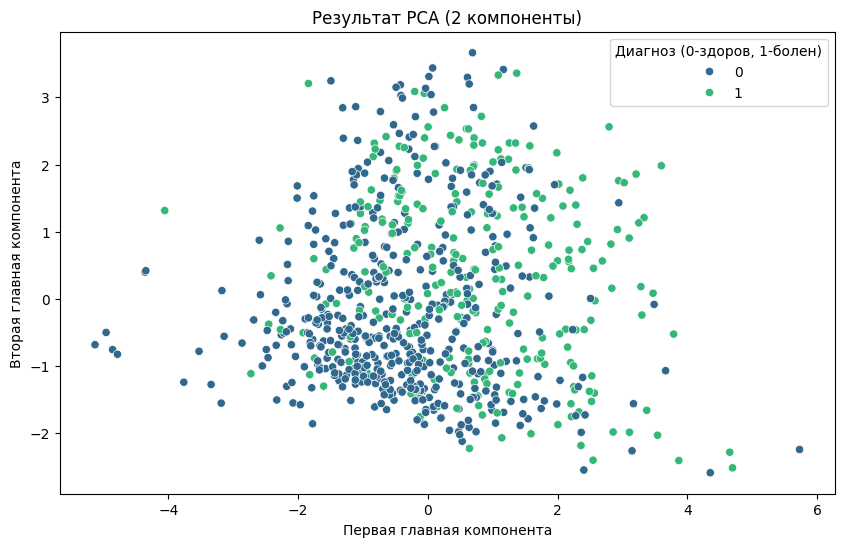

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='viridis')
plt.title('Результат PCA (2 компоненты)')
plt.xlabel('Первая главная компонента')
plt.ylabel('Вторая главная компонента')
plt.legend(title='Диагноз (0-здоров, 1-болен)')
plt.show()

## Метод LDA

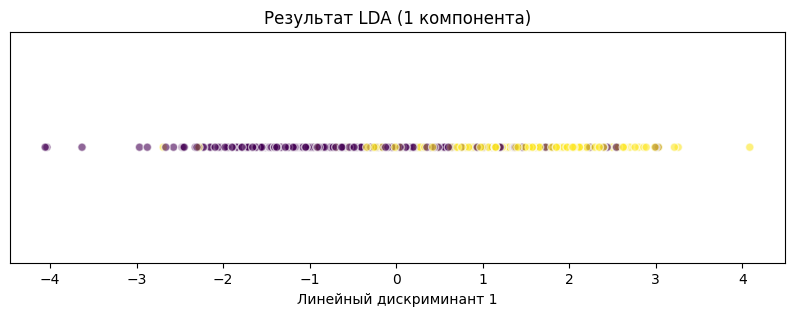

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X_scaled, y)

plt.figure(figsize=(10, 3))
plt.scatter(X_lda, np.zeros_like(X_lda), c=y, cmap='viridis', alpha=0.6, edgecolors='w')
plt.title('Результат LDA (1 компонента)')
plt.xlabel('Линейный дискриминант 1')
plt.yticks([]) # Убираем ось Y
plt.show()

## Метод TruncatedSVD

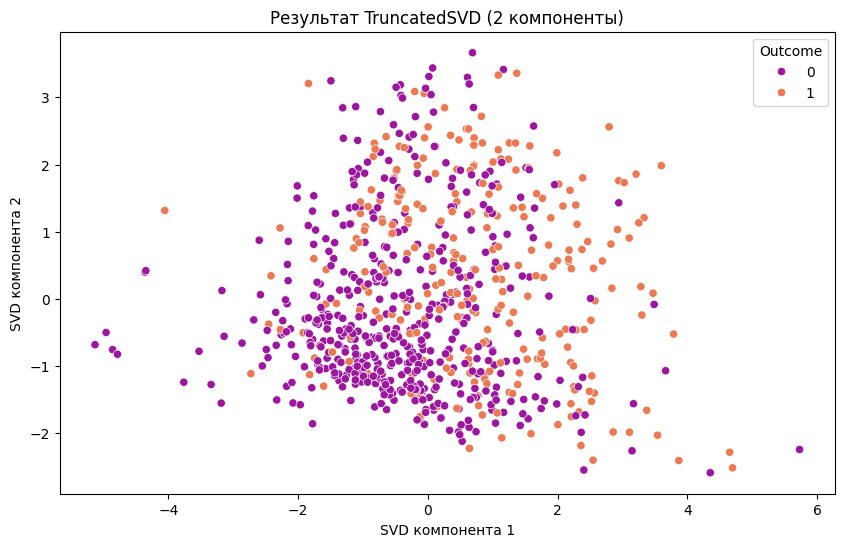

In [ ]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_svd[:, 0], y=X_svd[:, 1], hue=y, palette='plasma')
plt.title('Результат TruncatedSVD (2 компоненты)')
plt.xlabel('SVD компонента 1')
plt.ylabel('SVD компонента 2')
plt.show()

## Метод Kernel PCA

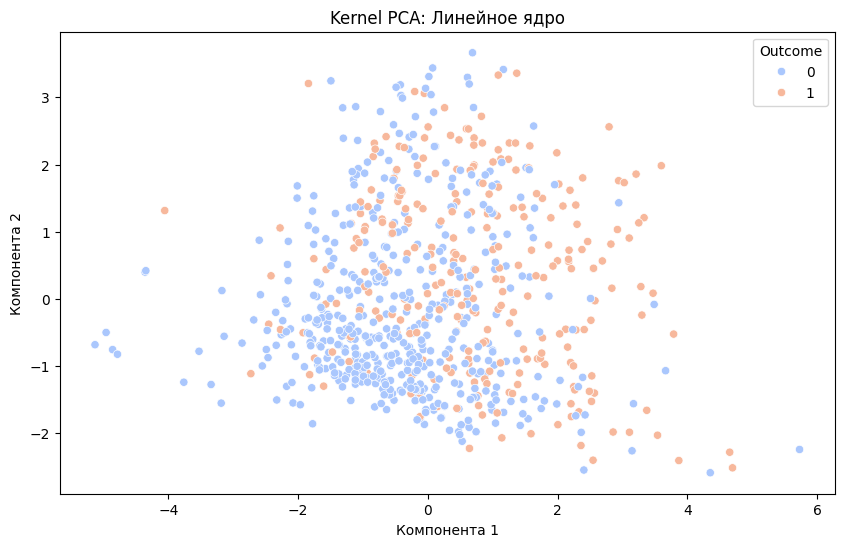

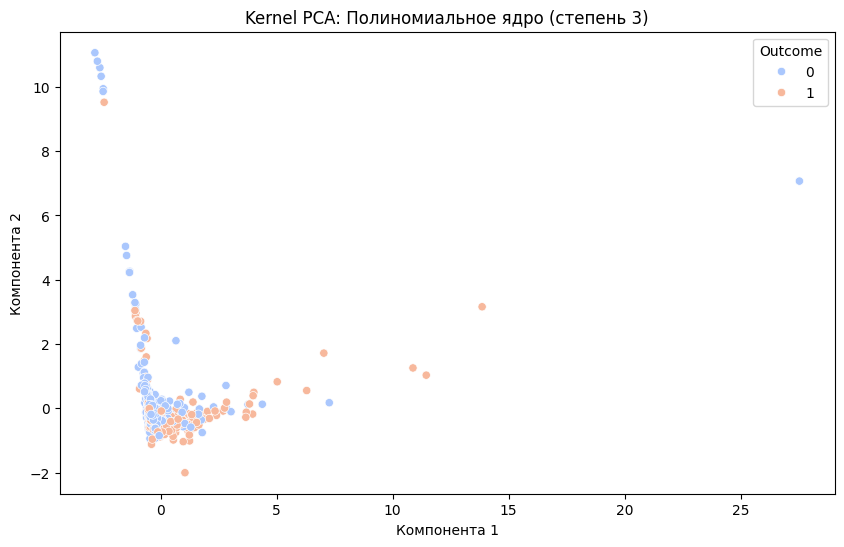

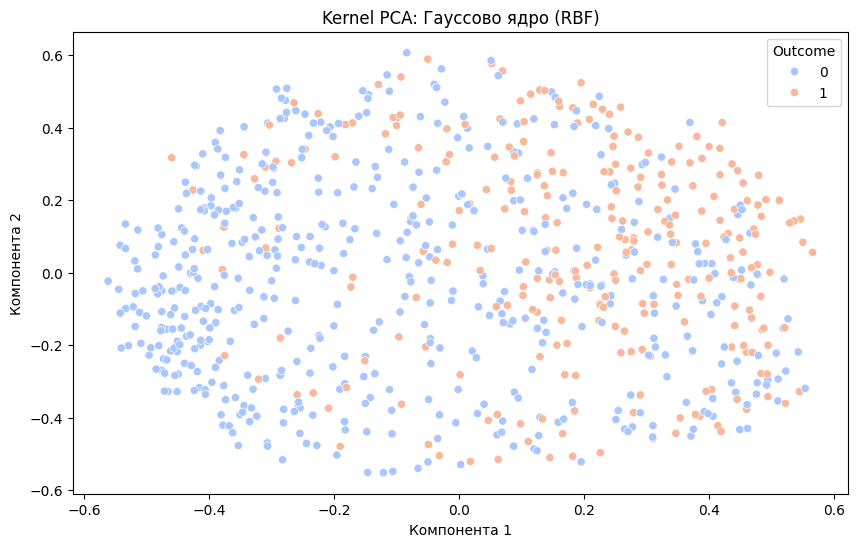

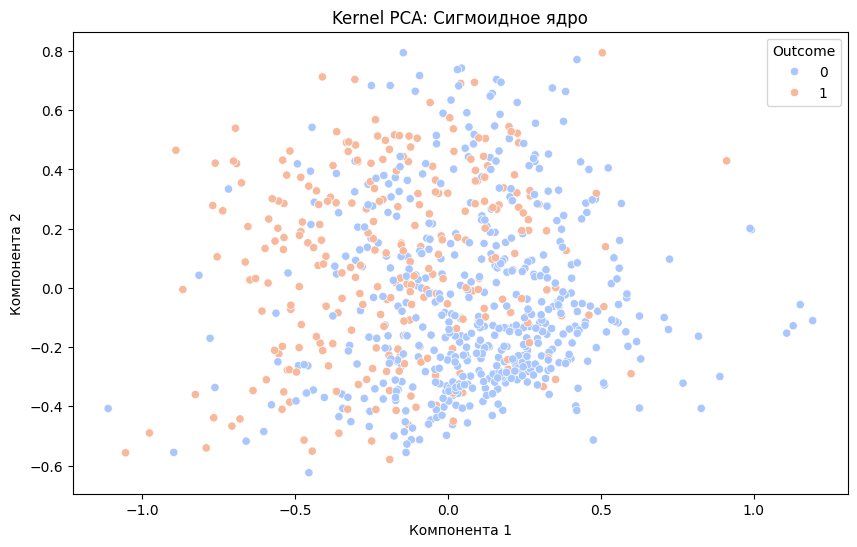

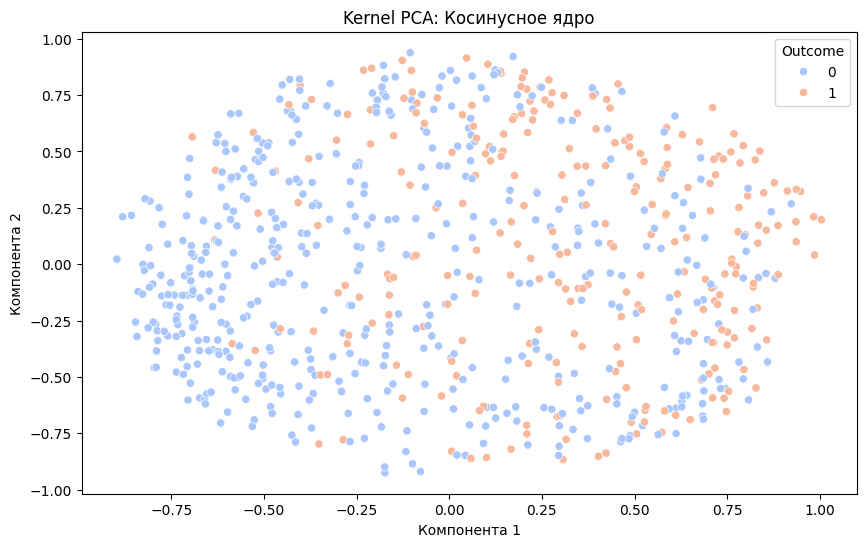

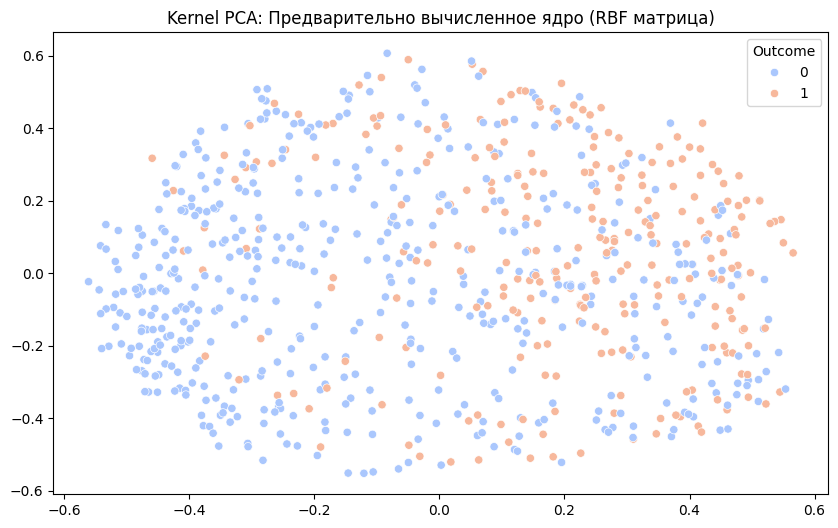

In [ ]:
def draw_kpca(model, title, data):
    X_kpca = model.fit_transform(data)
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=X_kpca[:, 0], y=X_kpca[:, 1], hue=y, palette='coolwarm')
    plt.title(f'Kernel PCA: {title}')
    plt.xlabel('Компонента 1')
    plt.ylabel('Компонента 2')
    plt.show()

# --- Линейное ядро ---
draw_kpca(KernelPCA(n_components=2, kernel='linear'), "Линейное ядро", X_scaled)
# Вывод: Аналогично обычному PCA.

# --- Полиномиальное ядро ---
draw_kpca(KernelPCA(n_components=2, kernel='poly', degree=3), "Полиномиальное ядро (степень 3)", X_scaled)
# Вывод: Позволяет учитывать криволинейные зависимости.

# --- Гауссово ядро (RBF) ---
draw_kpca(KernelPCA(n_components=2, kernel='rbf', gamma=0.1), "Гауссово ядро (RBF)", X_scaled)
# Вывод: Эффективно для выявления нелинейных структур, точки группируются плотнее.

# --- Сигмоидное ядро ---
draw_kpca(KernelPCA(n_components=2, kernel='sigmoid'), "Сигмоидное ядро", X_scaled)
# Вывод: Использует логистическую зависимость, часто дает вытянутую структуру данных.

# --- Косинусное ядро ---
draw_kpca(KernelPCA(n_components=2, kernel='cosine'), "Косинусное ядро", X_scaled)
# Вывод: Оценивает углы между векторами, данные распределяются по дугам.

# --- ПРЕДВАРИТЕЛЬНО ВЫЧИСЛЕННОЕ ЯДРО (Precomputed) ---
# Здесь МЕНЯЕМ логику: сначала считаем матрицу, потом подаем ее в модель
gram_matrix = rbf_kernel(X_scaled, gamma=0.1)
model_pre = KernelPCA(n_components=2, kernel='precomputed')
X_kpca_pre = model_pre.fit_transform(gram_matrix)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_kpca_pre[:, 0], y=X_kpca_pre[:, 1], hue=y, palette='coolwarm')
plt.title('Kernel PCA: Предварительно вычисленное ядро (RBF матрица)')
plt.show()
# Вывод: Позволяет использовать кастомные матрицы сходства. Результат подтверждает гибкость KPCA.

###  Ядерная функция `linear`

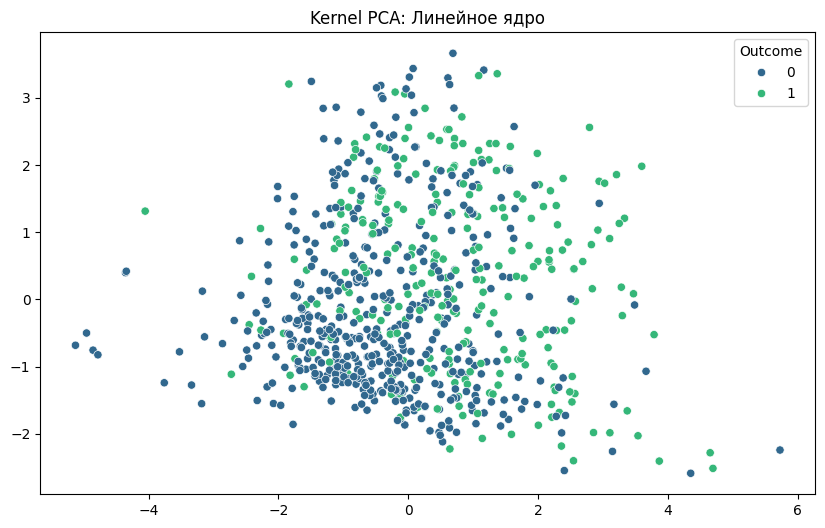

In [ ]:
from sklearn.decomposition import KernelPCA

kpca_lin = KernelPCA(n_components=2, kernel='linear')
X_kpca_lin = kpca_lin.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_kpca_lin[:, 0], y=X_kpca_lin[:, 1], hue=y, palette='viridis')
plt.title('Kernel PCA: Линейное ядро')
plt.show()

###  Ядерная функция `poly`

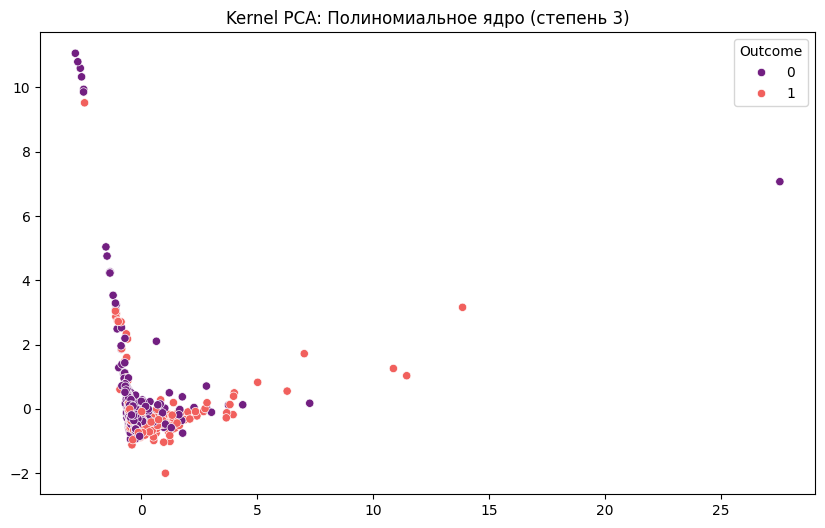

In [ ]:
kpca_poly = KernelPCA(n_components=2, kernel='poly', degree=3)
X_kpca_poly = kpca_poly.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_kpca_poly[:, 0], y=X_kpca_poly[:, 1], hue=y, palette='magma')
plt.title('Kernel PCA: Полиномиальное ядро (степень 3)')
plt.show()

###  Ядерная функция `rbf`

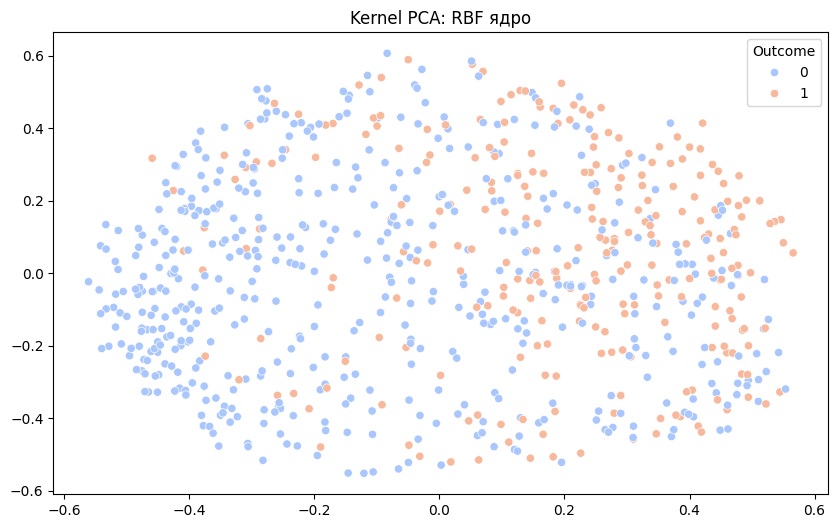

In [ ]:
kpca_rbf = KernelPCA(n_components=2, kernel='rbf', gamma=0.1)
X_kpca_rbf = kpca_rbf.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_kpca_rbf[:, 0], y=X_kpca_rbf[:, 1], hue=y, palette='coolwarm')
plt.title('Kernel PCA: RBF ядро')
plt.show()

###  Ядерная функция `sigmoid`

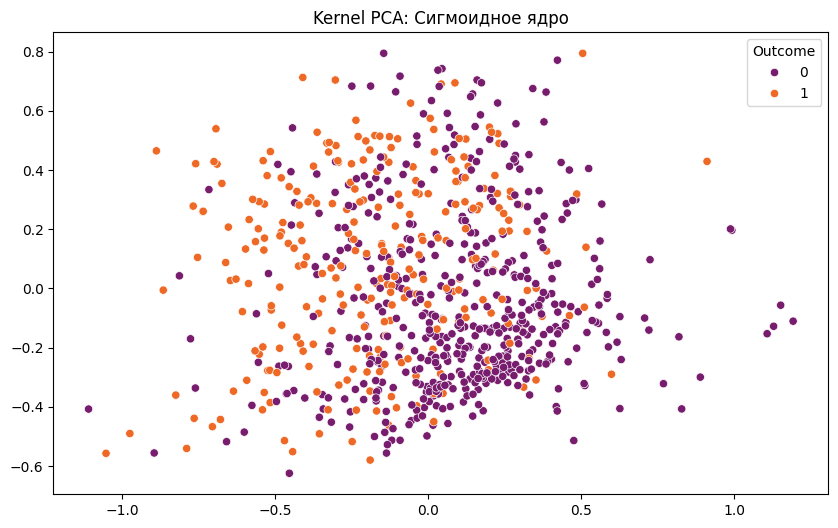

In [ ]:
kpca_sig = KernelPCA(n_components=2, kernel='sigmoid')
X_kpca_sig = kpca_sig.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_kpca_sig[:, 0], y=X_kpca_sig[:, 1], hue=y, palette='inferno')
plt.title('Kernel PCA: Сигмоидное ядро')
plt.show()

###  Ядерная функция `cosine`

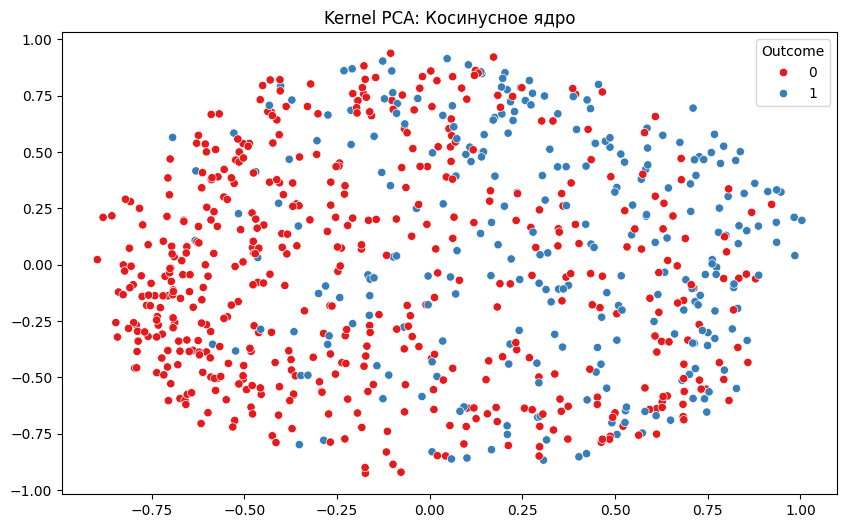

In [ ]:
kpca_cos = KernelPCA(n_components=2, kernel='cosine')
X_kpca_cos = kpca_cos.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_kpca_cos[:, 0], y=X_kpca_cos[:, 1], hue=y, palette='Set1')
plt.title('Kernel PCA: Косинусное ядро')
plt.show()

###  Ядерная функция `precomputed`

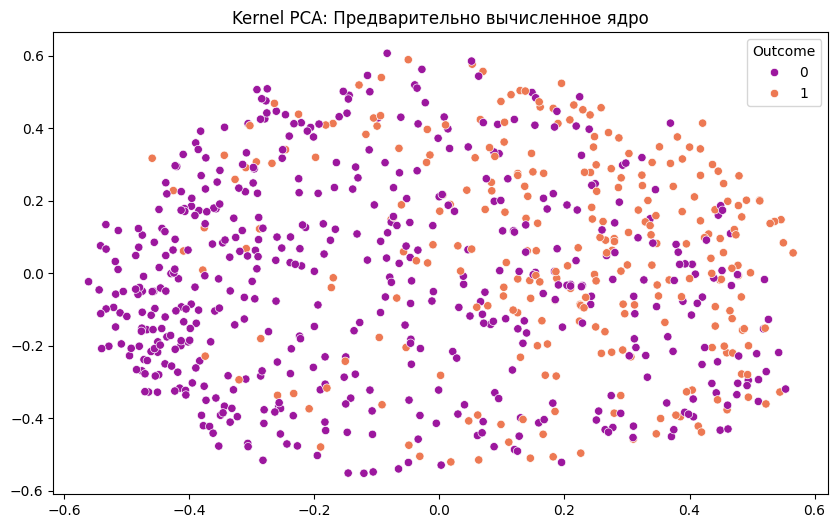

In [ ]:
from sklearn.metrics.pairwise import rbf_kernel

# Вычисляем матрицу сходства
gram_matrix = rbf_kernel(X_scaled, gamma=0.1)

kpca_pre = KernelPCA(n_components=2, kernel='precomputed')
X_kpca_pre = kpca_pre.fit_transform(gram_matrix)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_kpca_pre[:, 0], y=X_kpca_pre[:, 1], hue=y, palette='plasma')
plt.title('Kernel PCA: Предварительно вычисленное ядро')
plt.show()